# <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [3]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [4]:
label_folder_dict= create_label_folder_dict("./datasets/Animals")

In [5]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)
data_manager.process_data_label()
data_manager.train_valid_test_split()

butterfiles 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
elephants 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
horses 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
spiders 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Proc

In [6]:
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(4000, 32, 32, 3) (4000,)
(500, 32, 32, 3) (500,)
(500, 32, 32, 3) (500,)
['butterfiles' 'cats' 'chickens' 'cows' 'dogs' 'elephants' 'fishes'
 'horses' 'lions' 'spiders']


In [7]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5)

In [8]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)             

In [9]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)

Epoch 1/20
63/63 [==============================] - 8s 13ms/step - loss: 2.3375 - accuracy: 0.1258 - val_loss: 2.2861 - val_accuracy: 0.1400
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 2.2859 - accuracy: 0.1363 - val_loss: 2.3706 - val_accuracy: 0.1420
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 2.3063 - accuracy: 0.1085 - val_loss: 2.3066 - val_accuracy: 0.0840
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 2.3051 - accuracy: 0.0983 - val_loss: 2.3073 - val_accuracy: 0.0880
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 2.3050 - accuracy: 0.0990 - val_loss: 2.3097 - val_accuracy: 0.0820
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 2.3048 - accuracy: 0.0935 - val_loss: 2.3077 - val_accuracy: 0.0900
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 2.3049 - accuracy: 0.1015 - val_loss: 2.3062 - val_accuracy: 0.0820
Epoch 8/20
63/63 [=

In [10]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

8/8 [==============================] - 0s 3ms/step - loss: 2.3040 - accuracy: 0.0980


0.09799999743700027

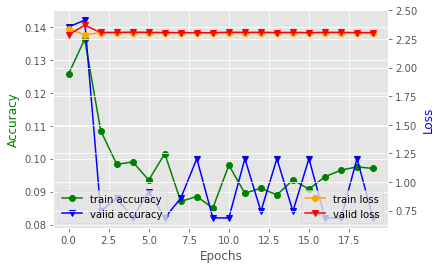

In [11]:
network1.plot_progress()

In [12]:
network1.predict(data_manager.X_test[0:10])

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64)

<Figure size 432x288 with 0 Axes>

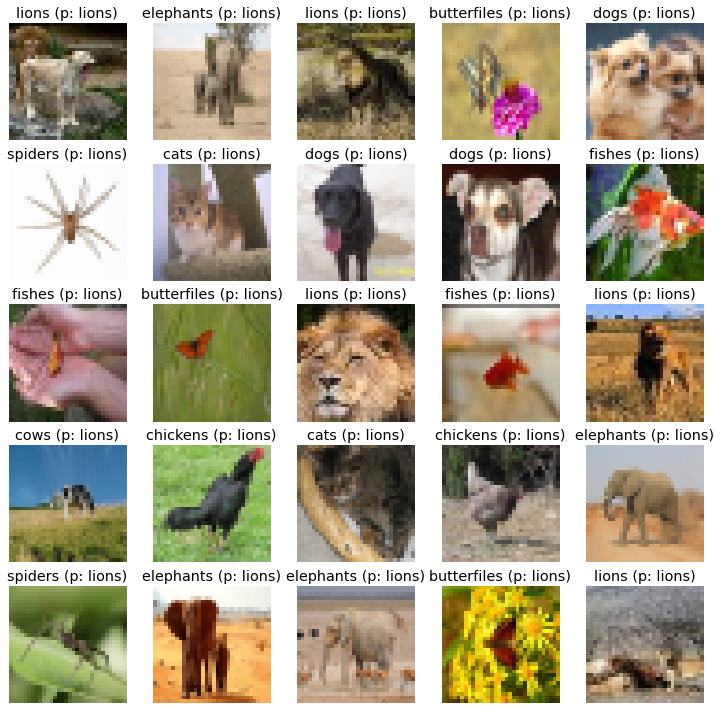

In [13]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

## more option of model

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [15]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate, verbose)
    
    def build_cnn(self):
        #Insert your code here
        self.model = models.Sequential()
        self.model.add(layers.Input(shape=(32,32,3)))
        for i in range(self.num_blocks):
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same', activation=None))
            if self.batch_norm:
                self.model.add(layers.BatchNormalization())
            self.model.add(layers.Activation(activation=self.activation_func))
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same', activation=None))
            if self.batch_norm:
                self.model.add(layers.BatchNormalization())
            self.model.add(layers.Activation(activation=self.activation_func))
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
            if self.drop_rate:
                self.model.add(layers.Dropout(rate=self.drop_rate))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
my_cnn = YourModel()
my_cnn.build_cnn()
my_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

### Drop out

In [17]:
for i in [0.2,0.3,0.4,0.5]:
    drop_out_network = YourModel(name='network1',
                         feature_maps=32,
                         num_classes=len(data_manager.classes),
                         num_blocks=4,
                         drop_rate= i, # enter your final dropout rate value here
                         batch_norm=None,     
                         optimizer='adam',
                         learning_rate= 0.001)
    drop_out_network.build_cnn()
    drop_out_network.fit(data_manager, batch_size = 64, num_epochs = 20)
    print("drop_rate: {} \n accuracy: {}".format(i,drop_out_network.compute_accuracy(data_manager.X_test, data_manager.y_test)))

Epoch 1/20
63/63 [==============================] - 2s 17ms/step - loss: 2.2349 - accuracy: 0.1493 - val_loss: 2.1939 - val_accuracy: 0.1780
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 2.1093 - accuracy: 0.1945 - val_loss: 2.0977 - val_accuracy: 0.1920
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 2.0482 - accuracy: 0.2325 - val_loss: 2.0134 - val_accuracy: 0.2360
Epoch 4/20
63/63 [==============================] - ETA: 0s - loss: 1.9553 - accuracy: 0.27 - 1s 9ms/step - loss: 1.9542 - accuracy: 0.2765 - val_loss: 2.0065 - val_accuracy: 0.2520
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.8386 - accuracy: 0.3358 - val_loss: 1.8143 - val_accuracy: 0.3540
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 1.7035 - accuracy: 0.3898 - val_loss: 1.7958 - val_accuracy: 0.3560
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 1.5778 - accuracy: 0.4325 - val_loss: 1.63

In [18]:
drop_out_network = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.2, # enter your final dropout rate value here
                     batch_norm=None,     
                     optimizer='adam',
                     learning_rate= 0.001)
drop_out_network.build_cnn()
drop_out_network.fit(data_manager, batch_size = 64, num_epochs = 20)
drop_out_network.summary()

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 2.2097 - accuracy: 0.1660 - val_loss: 2.0885 - val_accuracy: 0.2180
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 1.9748 - accuracy: 0.2803 - val_loss: 1.9661 - val_accuracy: 0.2820
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.8892 - accuracy: 0.3052 - val_loss: 1.9019 - val_accuracy: 0.2780
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.7686 - accuracy: 0.3397 - val_loss: 1.8443 - val_accuracy: 0.3160
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.6425 - accuracy: 0.3882 - val_loss: 1.6737 - val_accuracy: 0.3800
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 1.5728 - accuracy: 0.4185 - val_loss: 1.6885 - val_accuracy: 0.3620
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 1.4930 - accuracy: 0.4500 - val_loss: 1.5793 - val_accuracy: 0.4220
Epoch 8/20
63/63 

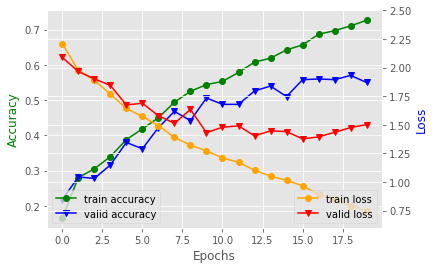

In [19]:
drop_out_network.plot_progress()

### batch normalization 

In [20]:
batch_norm_network = YourModel(name='network4',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001)
batch_norm_network.build_cnn()
batch_norm_network.fit(data_manager, batch_size = 64, num_epochs = 20)
batch_norm_network.summary()

Epoch 1/20
63/63 [==============================] - 2s 19ms/step - loss: 1.9421 - accuracy: 0.3330 - val_loss: 2.7716 - val_accuracy: 0.1260
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 1.5541 - accuracy: 0.4493 - val_loss: 2.9755 - val_accuracy: 0.0820
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3566 - accuracy: 0.5213 - val_loss: 2.7163 - val_accuracy: 0.1860
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1482 - accuracy: 0.5938 - val_loss: 2.8226 - val_accuracy: 0.2060
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0045 - accuracy: 0.6522 - val_loss: 2.5021 - val_accuracy: 0.2300
Epoch 6/20
63/63 [==============================] - 1s 12ms/step - loss: 0.8830 - accuracy: 0.6992 - val_loss: 1.9558 - val_accuracy: 0.3740
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.7600 - accuracy: 0.7377 - val_loss: 1.7455 - val_accuracy: 0.4440
Epoch 8/20
63

In [24]:
batch_norm_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

8/8 [==============================] - 0s 4ms/step - loss: 1.3315 - accuracy: 0.6580


0.6579999923706055

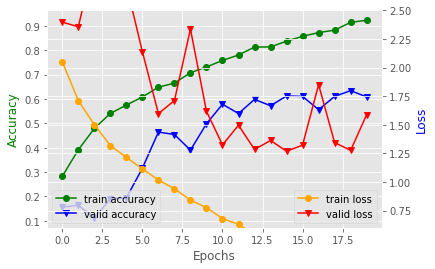

In [25]:
batch_norm_network.plot_progress()

In [23]:
batch_norm_network = YourModel(name='network4',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.2, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001)
batch_norm_network.build_cnn()
batch_norm_network.fit(data_manager, batch_size = 64, num_epochs =20)
batch_norm_network.summary()

Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 2.0509 - accuracy: 0.2828 - val_loss: 2.3976 - val_accuracy: 0.1560
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 1.7115 - accuracy: 0.3913 - val_loss: 2.3566 - val_accuracy: 0.1640
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.5019 - accuracy: 0.4787 - val_loss: 2.9466 - val_accuracy: 0.1120
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3189 - accuracy: 0.5405 - val_loss: 2.5344 - val_accuracy: 0.1900
Epoch 5/20
63/63 [==============================] - 1s 12ms/step - loss: 1.2154 - accuracy: 0.5748 - val_loss: 2.7214 - val_accuracy: 0.1940
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1151 - accuracy: 0.6080 - val_loss: 2.1388 - val_accuracy: 0.3160
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0175 - accuracy: 0.6480 - val_loss: 1.5980 - val_accuracy: 0.4640
Epoch 8/20
63

### data augmentation

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
         #reuse code of previous section here
        self.model = models.Sequential()
        self.model.add(layers.Input(shape=(32,32,3)))
        for i in range(self.num_blocks):
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same', activation=None))
            if self.batch_norm:
                self.model.add(layers.BatchNormalization())
            self.model.add(layers.Activation(activation=self.activation_func))
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same', activation=None))
            if self.batch_norm:
                self.model.add(layers.BatchNormalization())
            self.model.add(layers.Activation(activation=self.activation_func))
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
            if self.drop_rate:
                self.model.add(layers.Dropout(rate=self.drop_rate))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        #insert your code here
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs 
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max', patience=3)
        if self.is_augmentation == True:
            datagen = ImageDataGenerator(
            vertical_flip=True,
            horizontal_flip=True) 
            self.history = self.model.fit(datagen.flow(data_manager.X_train,data_manager.y_train, batch_size = 64), validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, batch_size = batch_size, verbose= self.verbose,callbacks=[callback])
        else:
            self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, batch_size = batch_size, verbose= self.verbose,callbacks=[callback])

In [28]:
augmentation_network = YourModel(name='network3',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.2, # enter your final keep_prob value here
                     batch_norm=True,
                     is_augmentation= True,
                     optimizer='adam',
                     learning_rate= 0.001)
augmentation_network.build_cnn()
augmentation_network.fit(data_manager, batch_size = 64, num_epochs = 20)
augmentation_network.summary()

Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 2.0694 - accuracy: 0.2735 - val_loss: 2.4666 - val_accuracy: 0.0960
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 1.7822 - accuracy: 0.3677 - val_loss: 2.6522 - val_accuracy: 0.0940
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.6210 - accuracy: 0.4397 - val_loss: 2.5733 - val_accuracy: 0.1500
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.4933 - accuracy: 0.4750 - val_loss: 2.6938 - val_accuracy: 0.2080
Epoch 5/20
63/63 [==============================] - 1s 12ms/step - loss: 1.4067 - accuracy: 0.5005 - val_loss: 2.0261 - val_accuracy: 0.3040
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3229 - accuracy: 0.5353 - val_loss: 2.3941 - val_accuracy: 0.2840
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 1.2751 - accuracy: 0.5550 - val_loss: 2.3363 - val_accuracy: 0.2980
Epoch 8/20
63

In [29]:
augmentation_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

8/8 [==============================] - 0s 4ms/step - loss: 1.1713 - accuracy: 0.6020


0.6019999980926514

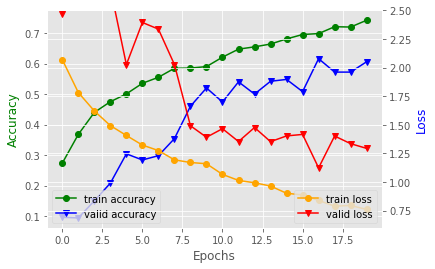

In [30]:
augmentation_network .plot_progress()

### Label Smoothing

In [31]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
import numpy as np

In [32]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
         #reuse code of previous section here
        self.model = models.Sequential()
        self.model.add(layers.Input(shape=(32,32,3)))
        for i in range(self.num_blocks):
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same', activation=None))
            if self.batch_norm:
                self.model.add(layers.BatchNormalization())
            self.model.add(layers.Activation(activation=self.activation_func))
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same', activation=None))
            if self.batch_norm:
                self.model.add(layers.BatchNormalization())
            self.model.add(layers.Activation(activation=self.activation_func))
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
            if self.drop_rate:
                self.model.add(layers.Dropout(rate=self.drop_rate))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        self.model.compile(optimizer=self.optimizer, loss= CategoricalCrossentropy(label_smoothing=0.01), metrics=['accuracy'])
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        #insert your code here
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs 
        self.model.compile(optimizer=self.optimizer, loss= CategoricalCrossentropy(label_smoothing=0.01), metrics=['accuracy'])
        if self.is_augmentation == True:
            datagen = ImageDataGenerator(
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True)
            self.history = self.model.fit(datagen.flow(data_manager.X_train,to_categorical(data_manager.y_train), batch_size = 64), validation_data = (data_manager.X_valid, to_categorical(data_manager.y_valid)), 
                                      epochs = num_epochs, batch_size = batch_size, verbose= self.verbose)
        else:
            self.history = self.model.fit(x = data_manager.X_train, y = to_categorical(data_manager.y_train), validation_data = (data_manager.X_valid, to_categorical(data_manager.y_valid)), 
                                      epochs = num_epochs, batch_size = batch_size, verbose= self.verbose)

In [33]:
smooth_label_network = YourModel(name='network4',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.2, # enter your final keep_prob value here
                     batch_norm=True,
                     is_augmentation= True,
                     optimizer='adam',
                     learning_rate= 0.001)
smooth_label_network.build_cnn()
smooth_label_network.fit(data_manager, batch_size = 64, num_epochs = 20)
smooth_label_network.compute_accuracy(data_manager.X_test, to_categorical(data_manager.y_test))
smooth_label_network.summary()

Epoch 1/20
63/63 [==============================] - 3s 30ms/step - loss: 2.0952 - accuracy: 0.2688 - val_loss: 2.4466 - val_accuracy: 0.1520
Epoch 2/20
63/63 [==============================] - 2s 26ms/step - loss: 1.8766 - accuracy: 0.3440 - val_loss: 2.4801 - val_accuracy: 0.1340
Epoch 3/20
63/63 [==============================] - 2s 25ms/step - loss: 1.7397 - accuracy: 0.3980 - val_loss: 2.3384 - val_accuracy: 0.2260- loss: 1.7359 - ac
Epoch 4/20
63/63 [==============================] - 2s 25ms/step - loss: 1.6416 - accuracy: 0.4365 - val_loss: 3.0140 - val_accuracy: 0.1400s - loss: 1.6801 - accuracy: 0.41 - ETA: 0s - loss:
Epoch 5/20
63/63 [==============================] - 2s 24ms/step - loss: 1.5313 - accuracy: 0.4735 - val_loss: 3.1196 - val_accuracy: 0.1800
Epoch 6/20
63/63 [==============================] - 2s 25ms/step - loss: 1.5042 - accuracy: 0.4773 - val_loss: 2.3847 - val_accuracy: 0.2780
Epoch 7/20
63/63 [==============================] - 2s 25ms/step - loss: 1.4170 - ac

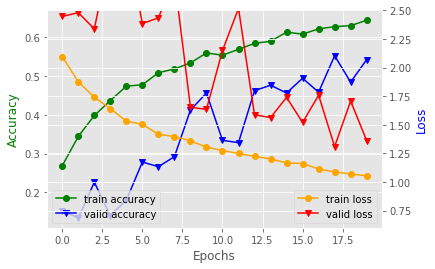

In [34]:
smooth_label_network.plot_progress()

### Data Mixup

In [35]:
data_manager_mixup = data_manager

In [36]:
def mixup(data, one_hot_labels, alpha=0.2, debug=False):
    np.random.seed(1234)
    batch_size = len(data)
    weights = np.random.beta(alpha, alpha, batch_size)
    print(weights)
    index = np.random.permutation(batch_size)
    x1, x2 = data, data[index]
    x = np.array([x1[i] * weights [i] + x2[i] * (1 - weights[i]) for i in range(len(weights))])
    y1 = np.array(one_hot_labels).astype(np.float)
    y2 = np.array(np.array(one_hot_labels)[index]).astype(np.float)
    y = np.array([y1[i] * weights[i] + y2[i] * (1 - weights[i]) for i in range(len(weights))])
    
    print('Mixup weights', weights)
    return x, y

In [37]:
data_manager_mixup.X_train,data_manager_mixup.y_train = mixup(data_manager_mixup.X_train, data_manager_mixup.y_train, alpha=1)

[0.23538939 0.41664195 0.39750064 ... 0.22422728 0.58068498 0.93705452]
Mixup weights [0.23538939 0.41664195 0.39750064 ... 0.22422728 0.58068498 0.93705452]


In [39]:
smooth_label_network.fit(data_manager_mixup, batch_size = 64, num_epochs = 20)

Epoch 1/20
63/63 [==============================] - 3s 32ms/step - loss: 1.8642 - accuracy: 0.2950 - val_loss: 2.6210 - val_accuracy: 0.2140
Epoch 2/20
63/63 [==============================] - 2s 28ms/step - loss: 1.8211 - accuracy: 0.3117 - val_loss: 2.0955 - val_accuracy: 0.2120
Epoch 3/20
63/63 [==============================] - 2s 28ms/step - loss: 1.8105 - accuracy: 0.3180 - val_loss: 2.5415 - val_accuracy: 0.2540
Epoch 4/20
63/63 [==============================] - 2s 26ms/step - loss: 1.7821 - accuracy: 0.3300 - val_loss: 2.3344 - val_accuracy: 0.2220
Epoch 5/20
63/63 [==============================] - 2s 28ms/step - loss: 1.7653 - accuracy: 0.3228 - val_loss: 2.2834 - val_accuracy: 0.2220 0s - loss: 1.7610 - accuracy: 0.32 - ETA: 0s - loss: 1.7620 - accuracy: 0.
Epoch 6/20
63/63 [==============================] - 2s 26ms/step - loss: 1.7315 - accuracy: 0.3503 - val_loss: 2.1208 - val_accuracy: 0.2640
Epoch 7/20
63/63 [==============================] - 2s 26ms/step - loss: 1.7484

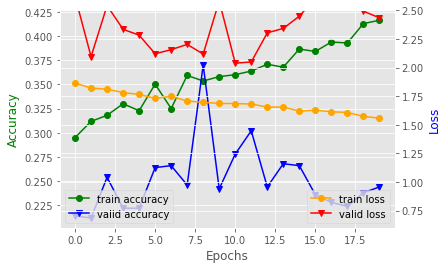

In [40]:
smooth_label_network.plot_progress()

### Attack model (FGSM)

In [42]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
         #reuse code of previous section here
        self.model = models.Sequential()
        self.model.add(layers.Input(shape=(32,32,3)))
        for i in range(self.num_blocks):
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same', activation=None))
            if self.batch_norm:
                self.model.add(layers.BatchNormalization())
            self.model.add(layers.Activation(activation=self.activation_func))
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same', activation=None))
            if self.batch_norm:
                self.model.add(layers.BatchNormalization())
            self.model.add(layers.Activation(activation=self.activation_func))
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
            if self.drop_rate:
                self.model.add(layers.Dropout(rate=self.drop_rate))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model_1 = self.model
        return  self.model
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        #insert your code here
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs 
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max', patience=3)
        if self.is_augmentation == True:
            datagen = ImageDataGenerator(
            vertical_flip=True,
            horizontal_flip=True)  
            self.history = self.model.fit(datagen.flow(data_manager.X_train,data_manager.y_train, batch_size = 64), validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, batch_size = batch_size, verbose= self.verbose,callbacks=[callback])
        else:
            self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, batch_size = batch_size, verbose= self.verbose,callbacks=[callback])  

In [43]:
def fgsm_attack(model, input_image, input_label=None, 
               epsilon=0.3,
               clip_value_min=0., 
               clip_value_max=1.0, 
               soft_label=False,
               from_logits=True):     
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy
    
#     compute CE loss from logits or prediction probabilities 
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)  
    if type(input_label) is np.ndarray: 
        input_label =  tf.convert_to_tensor(input_label,dtype='float32')
    output=tf.Variable(0.0)
    loss = tf.Variable(0.0)
    with tf.GradientTape(watch_accessed_variables=False) as tape: 
        tape.watch([input_image,loss])
        output =  model(input_image)
        if not soft_label:
            loss = loss_fn(input_label, output, from_logits=True) # use ground-truth label to attack
        else: 
            pred_label = tf.math.argmax(output, axis=1) # use predicted label to attack
            loss = loss_fn(pred_label, to_categorical(output), from_logits=False)
        gradient = tape.gradient(loss,input_image)
#         gradient = tape.gradient(loss,input_image,unconnected_gradients='zero')# get the gradients of the loss w.r.t. the input image 
        adv_image = input_image + epsilon * tf.sign(gradient)     # get the final adversarial examples 
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input
    return adv_image

In [44]:
best_network = YourModel(name='network4',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.2, # enter your final keep_prob value here
                     batch_norm=True,
                     is_augmentation= True,
                     optimizer='adam',
                     learning_rate= 0.001)
myModel = best_network.build_cnn()

In [45]:
data_set = np.random.choice(len(data_manager.X_test)-20)

In [46]:
image_samples_fgsm = fgsm_attack(myModel , data_manager.X_test[data_set:(data_set+20)], data_manager.y_test[data_set:(data_set+20)], epsilon=0.0313, clip_value_min=0.0, 
               clip_value_max=1.0)

C:\ProgramData\Anaconda3\envs\tf_gpu_p38\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


In [47]:
def plot_image_grid(num_row, num_col, image):
        fig, axes = plt.subplots(num_row, num_col, figsize=(10*num_col,10*num_row))
        for i in range(num_row*num_col):
            ax = axes[i//num_col, i%num_col]
            ax.imshow(image[i])
        plt.tight_layout()
        plt.show()

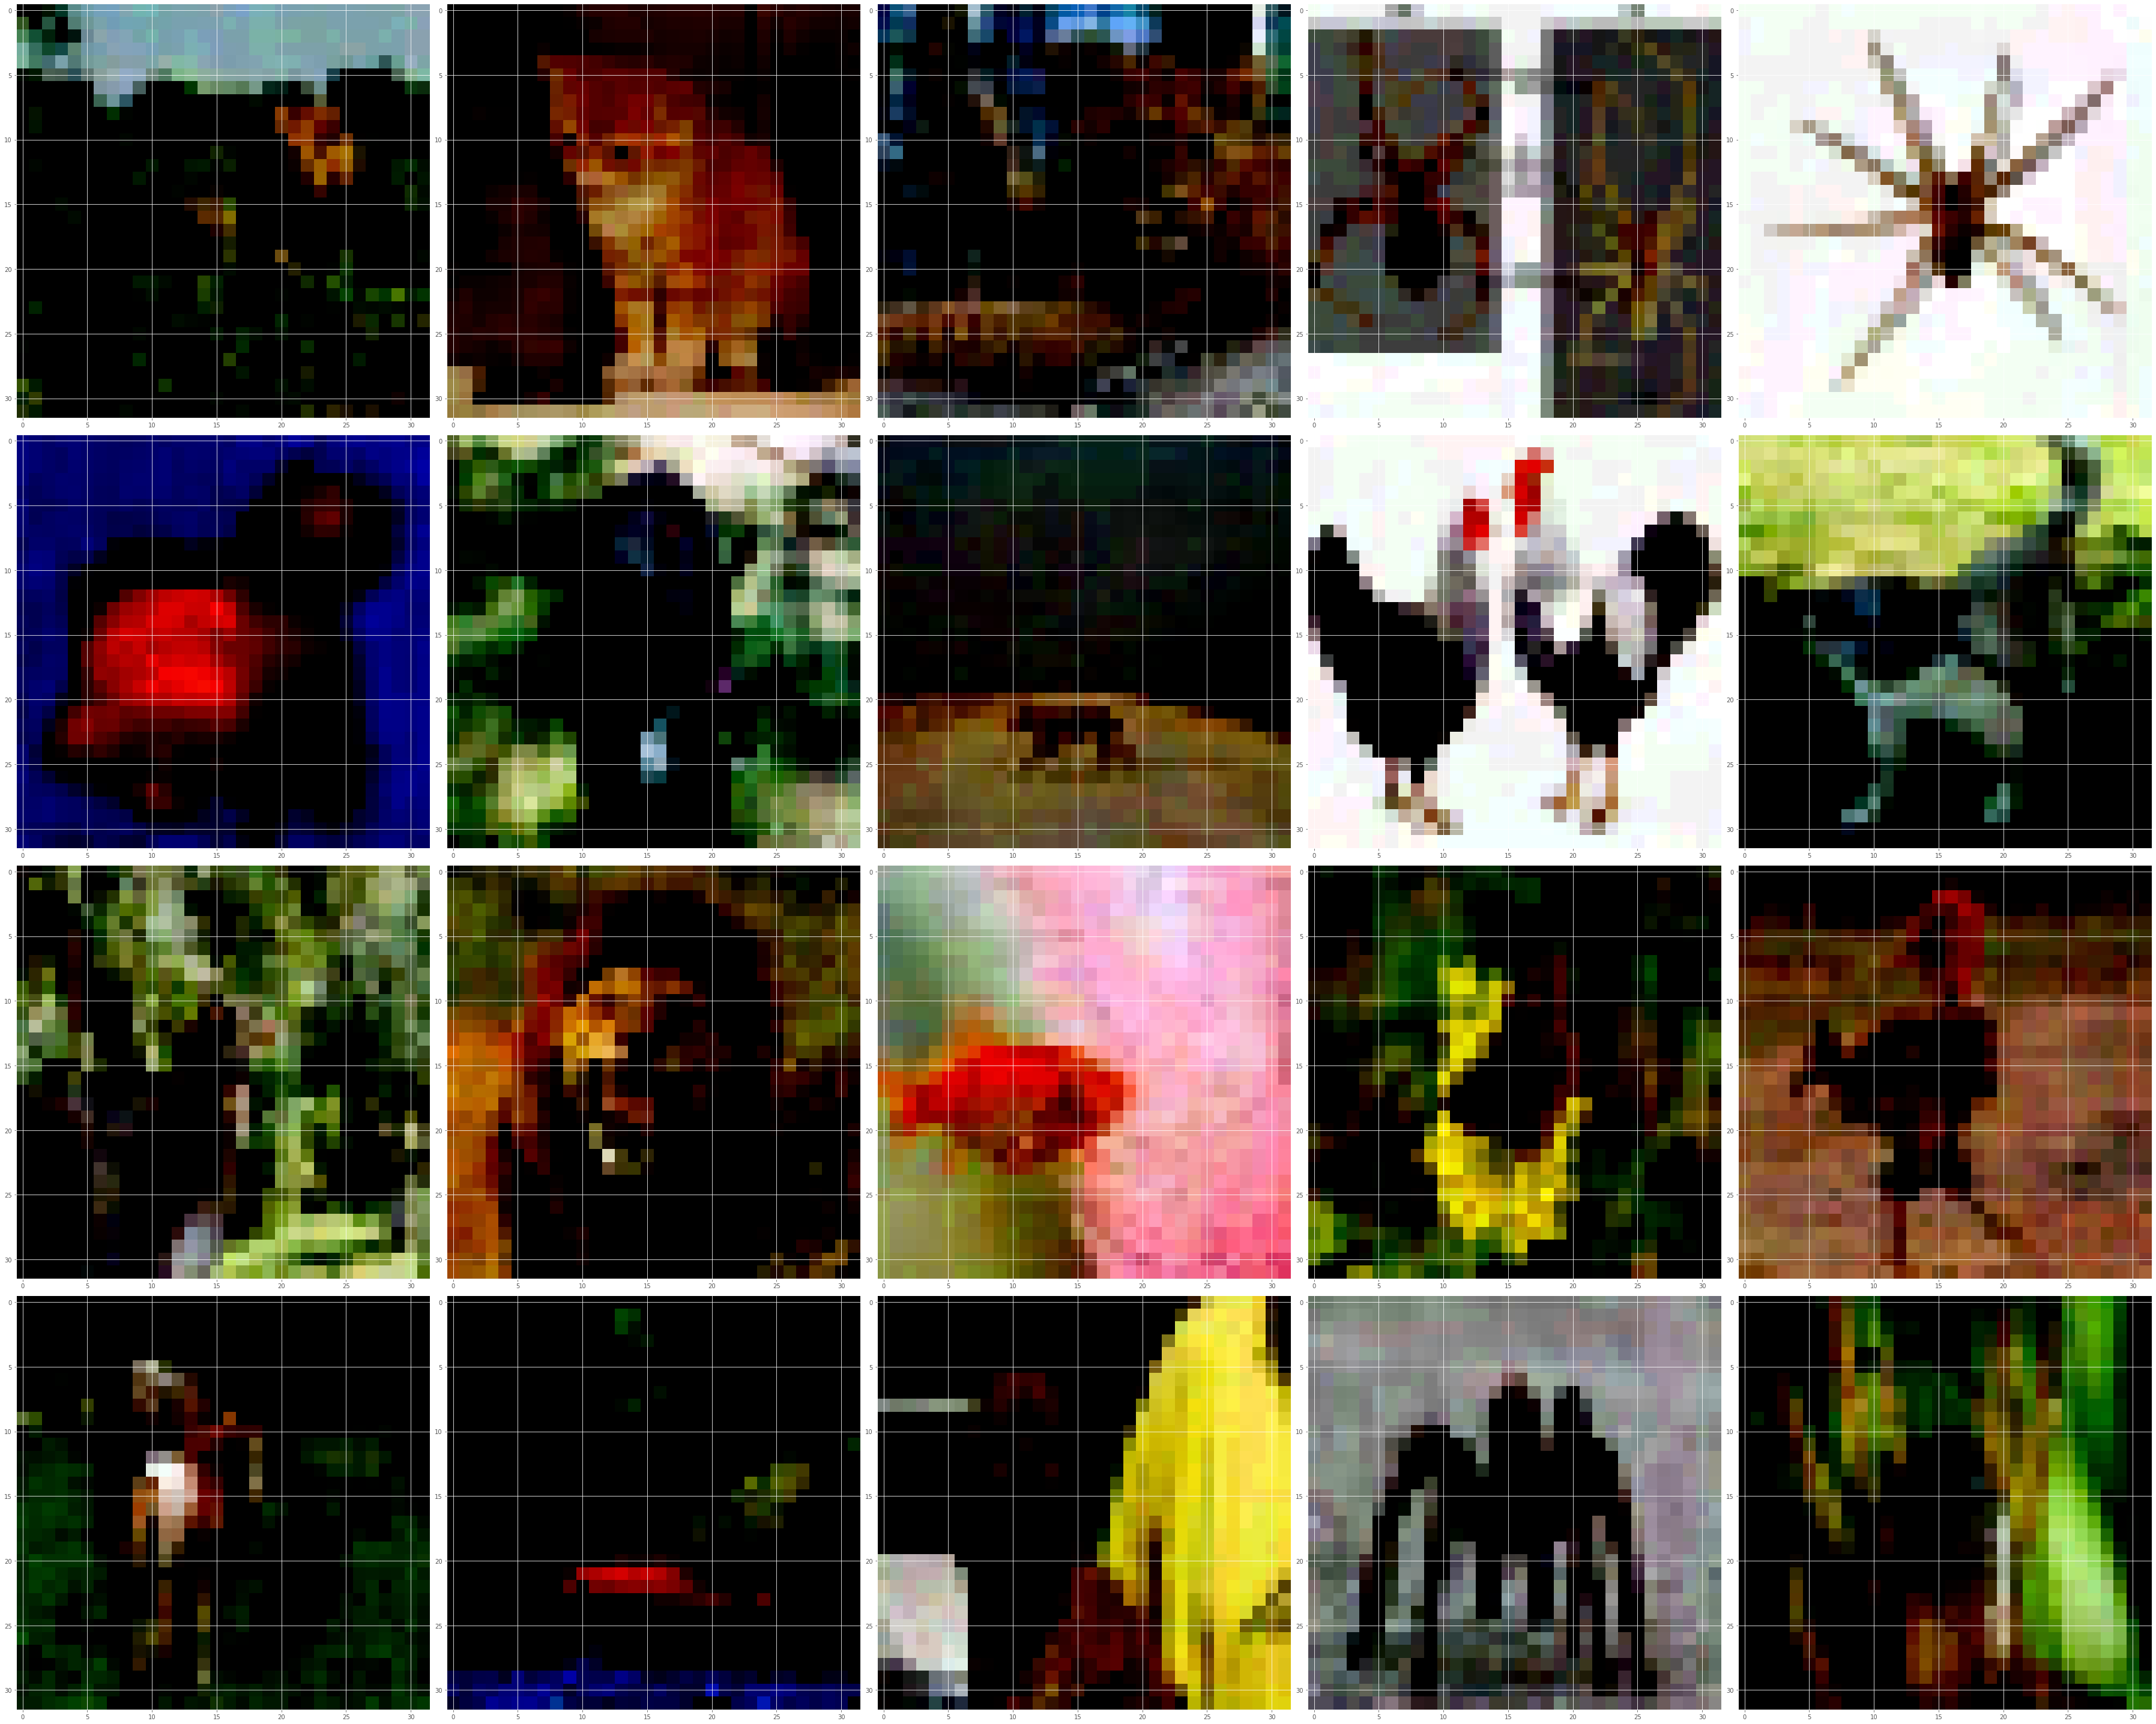

In [48]:
plot_image_grid(4,5,image_samples_fgsm)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

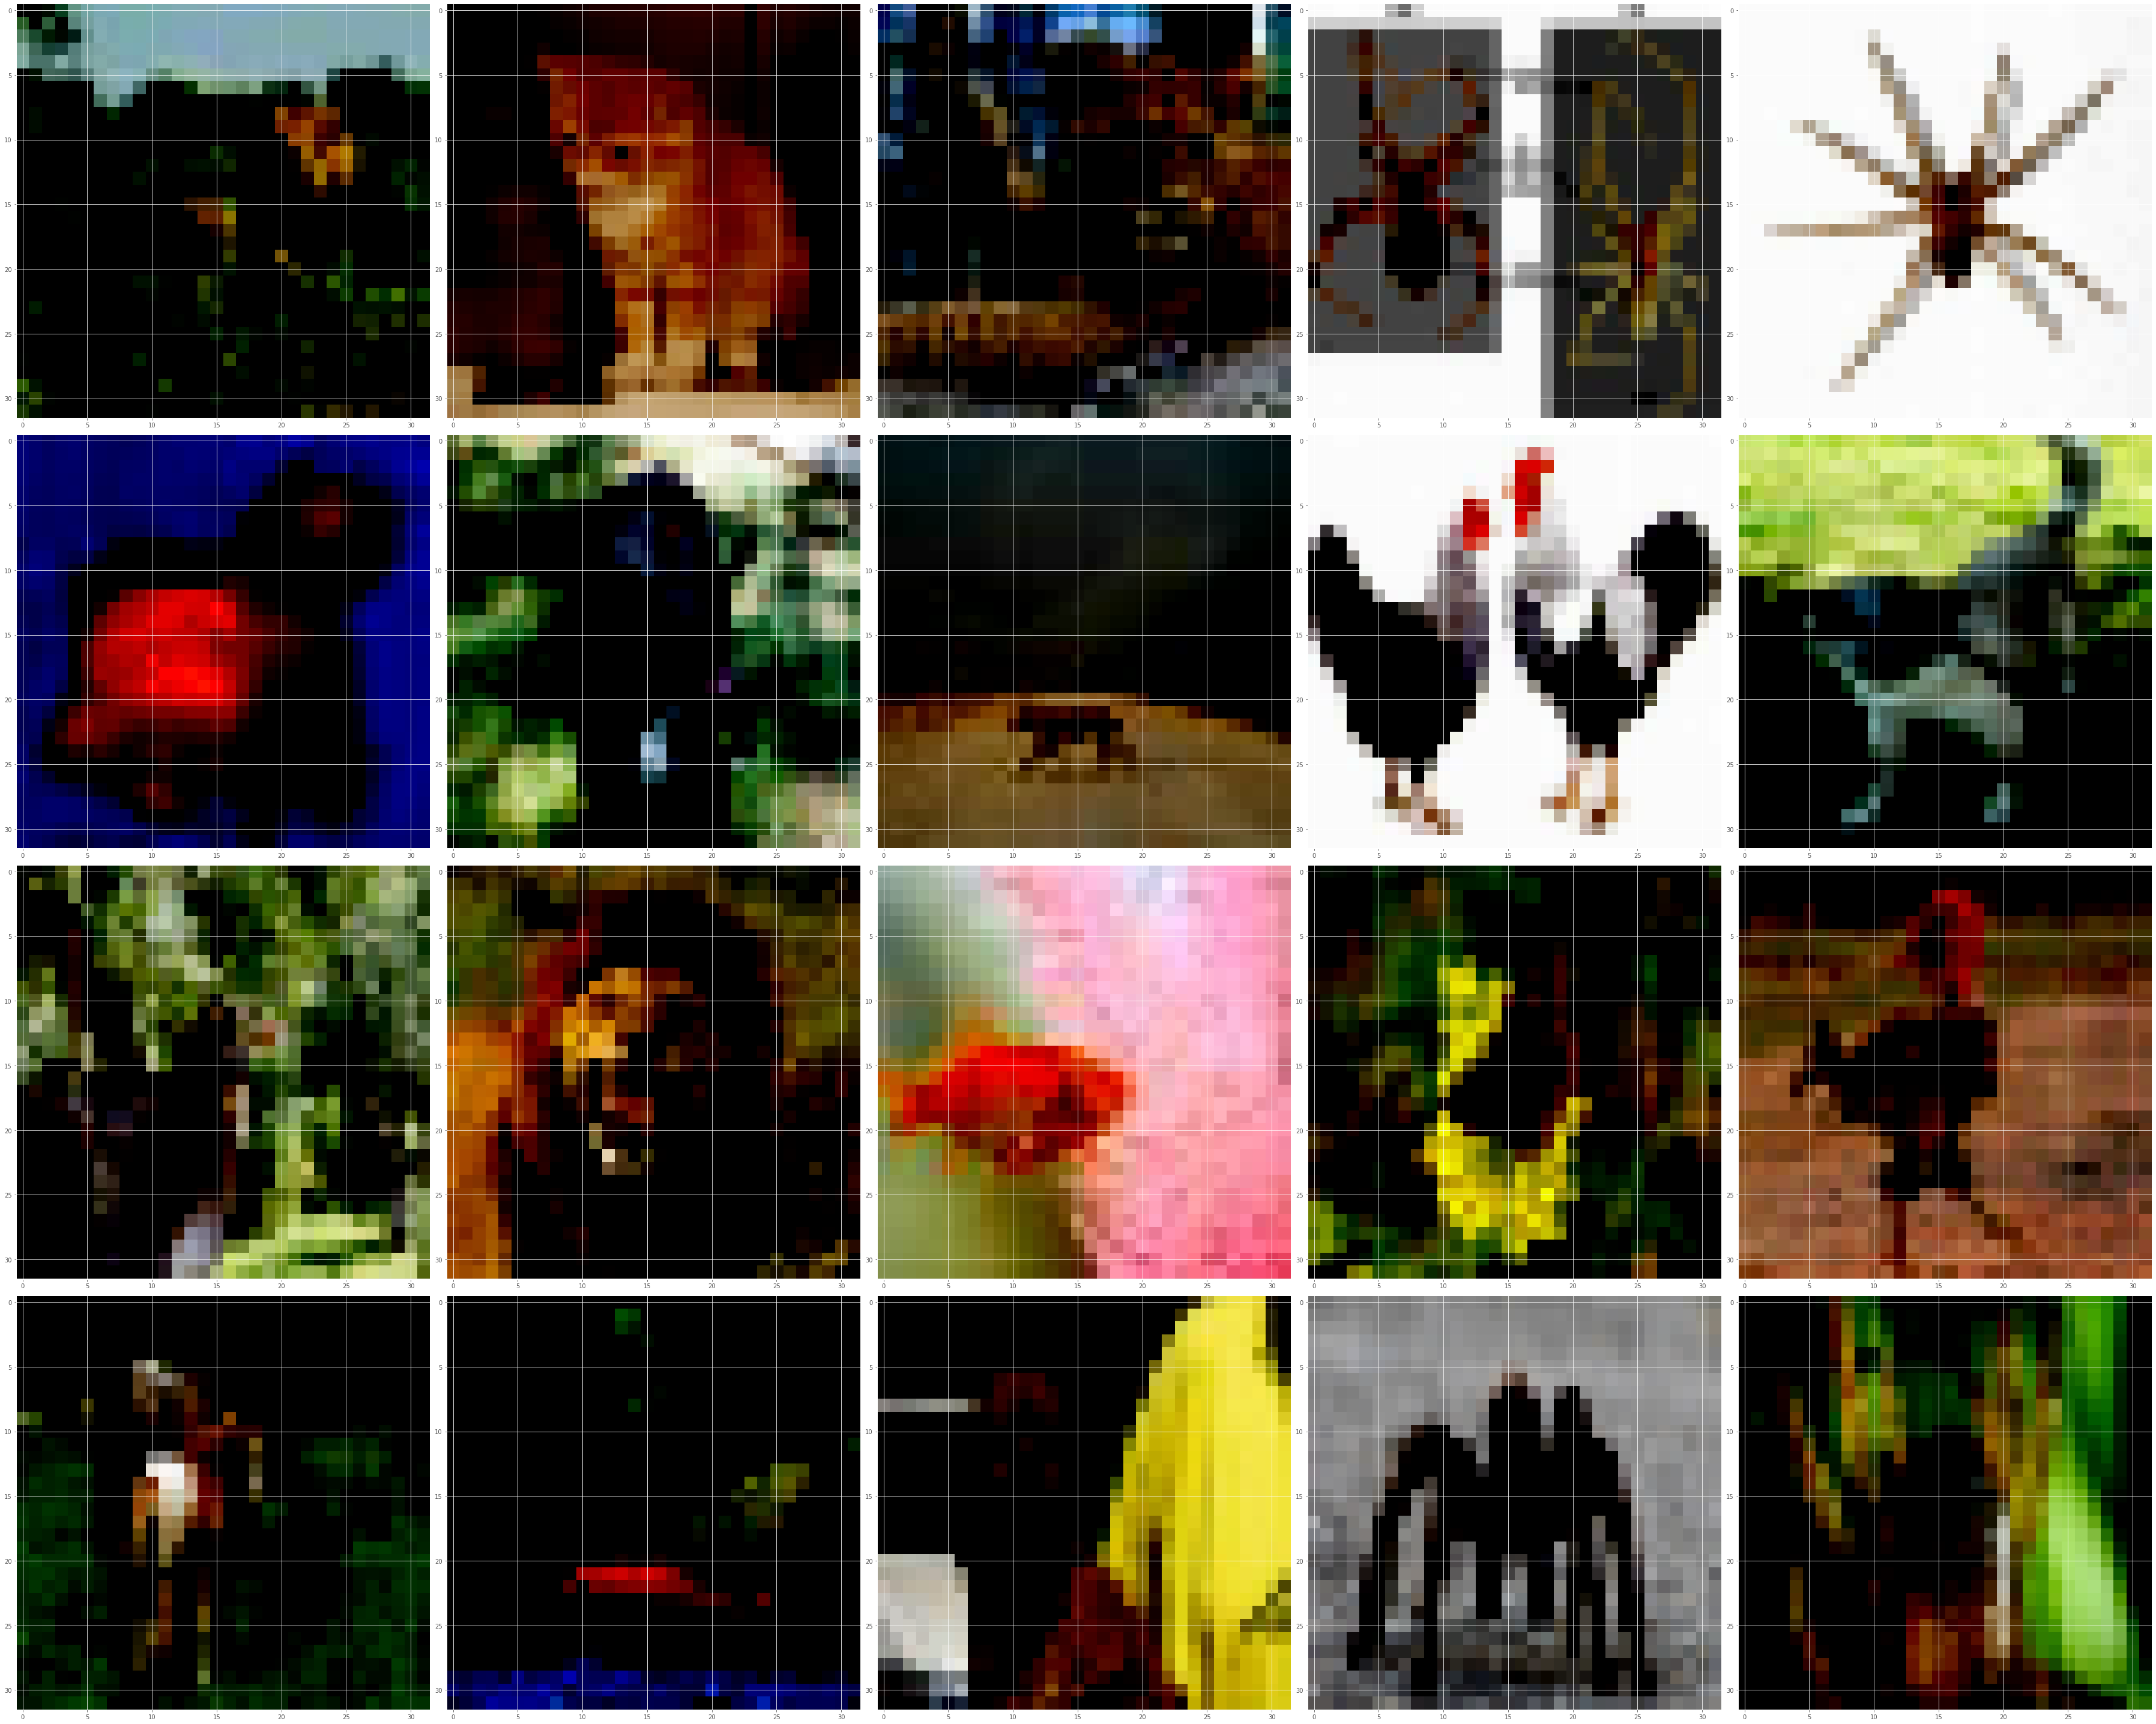

In [49]:
plot_image_grid(4,5,data_manager.X_test[data_set:(data_set+20)])

### Attack model (PGD)

In [50]:
def pgd_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits= True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy  #compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label,dtype='float64')
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon,dtype='float64')
    adv_image = input_image + random_noise

    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output =model(adv_image)
            if type(adv_output) is np.ndarray:
                adv_output = tf.convert_to_tensor(adv_output,dtype='float64')
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits= from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, to_categorical(adv_output), from_logits= from_logits) # use predicted label to attack
        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)  # clip to a valid range
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    return adv_image

In [51]:
image_samples_pgd = pgd_attack(myModel, data_manager.X_test[data_set:(data_set+20)], data_manager.y_test[data_set:(data_set+20)], 0.0313, 20, 0.01, 0.0, 1.0)

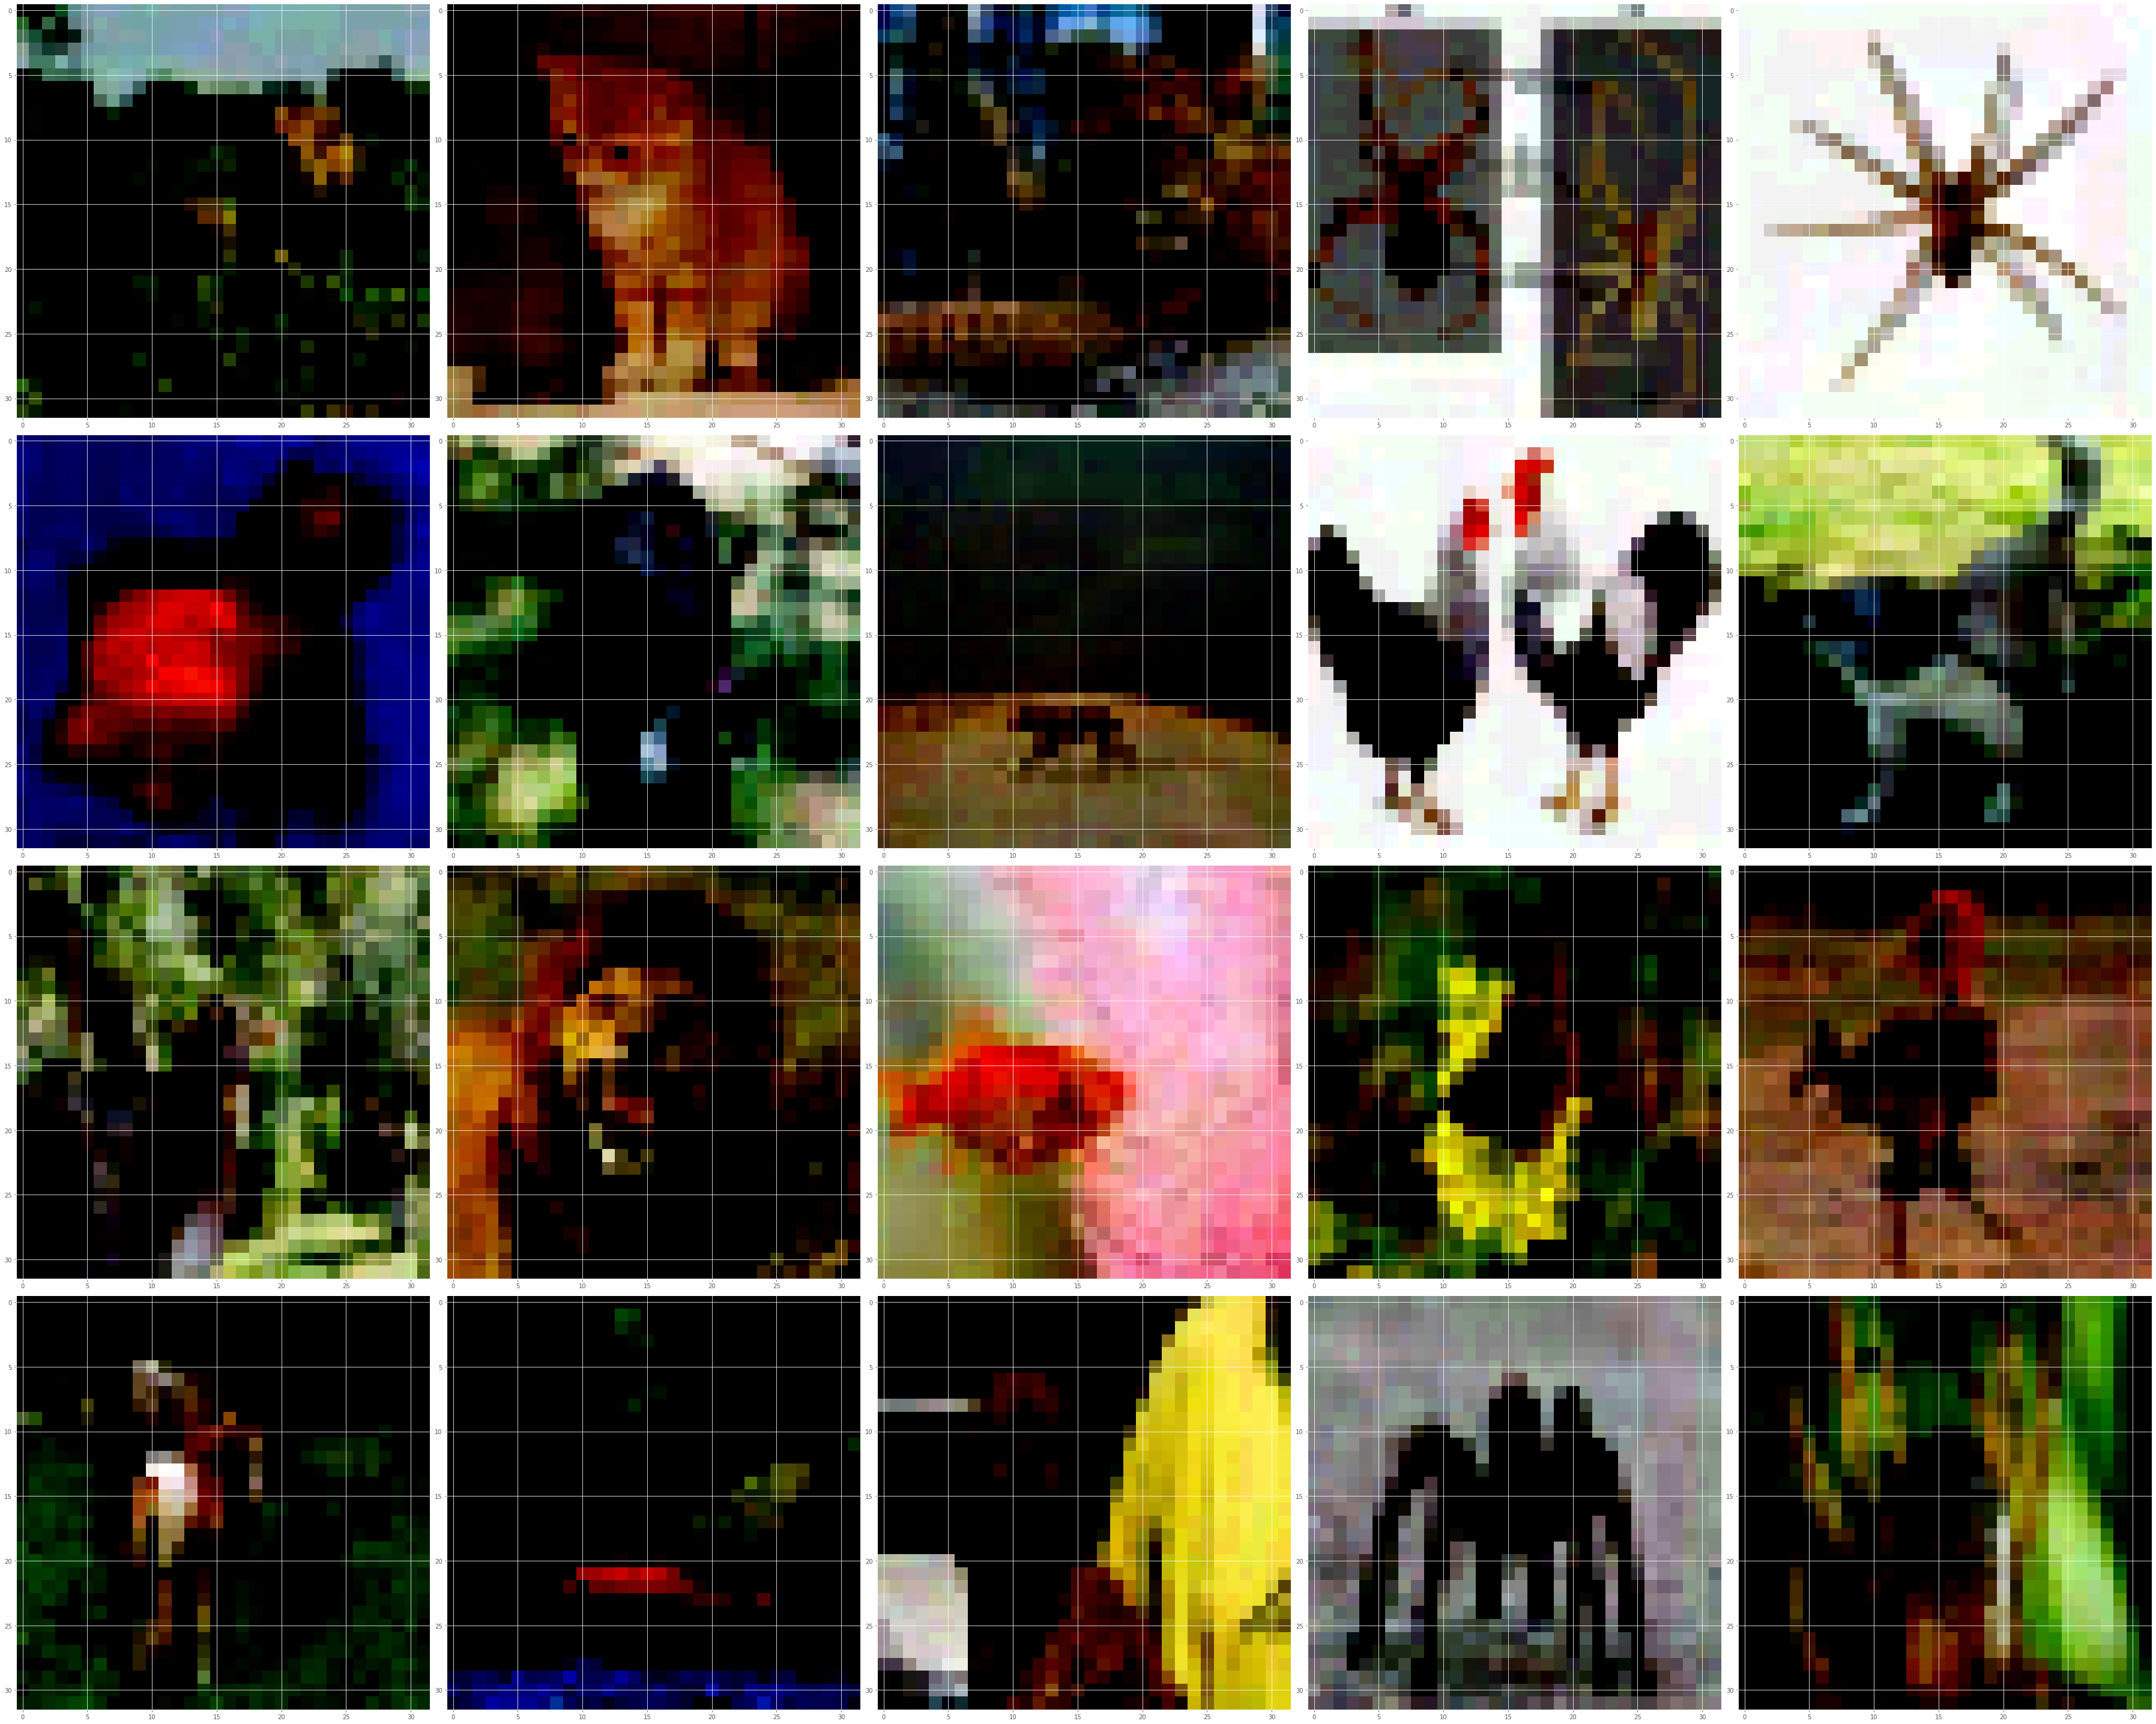

In [52]:
plot_image_grid(4,5,image_samples_pgd)

### Attack model (MIM)

In [53]:
def mim_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              gamma= 0.9,
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits= True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        gamma: momentum decay
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label,dtype='float64')
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon,dtype='float64')
    adv_image = input_image + random_noise
    adv_noise = random_noise

    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits=from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits=from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image_new = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image_new = tf.clip_by_value(adv_image_new, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image_new = tf.clip_by_value(adv_image_new, clip_value_min, clip_value_max) # clip to a valid range
        adv_noise = gamma*adv_noise + (1-gamma)*(adv_image_new - adv_image)
        adv_image = adv_image_new
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    adv_image = adv_image + adv_noise
    adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range
    return adv_image

In [54]:
image_samples_mim = mim_attack(myModel, data_manager.X_test[data_set:(data_set+20)], data_manager.y_test[data_set:(data_set+20)], 0.0313, 0.9,20, 0.01, 0.0, 255.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


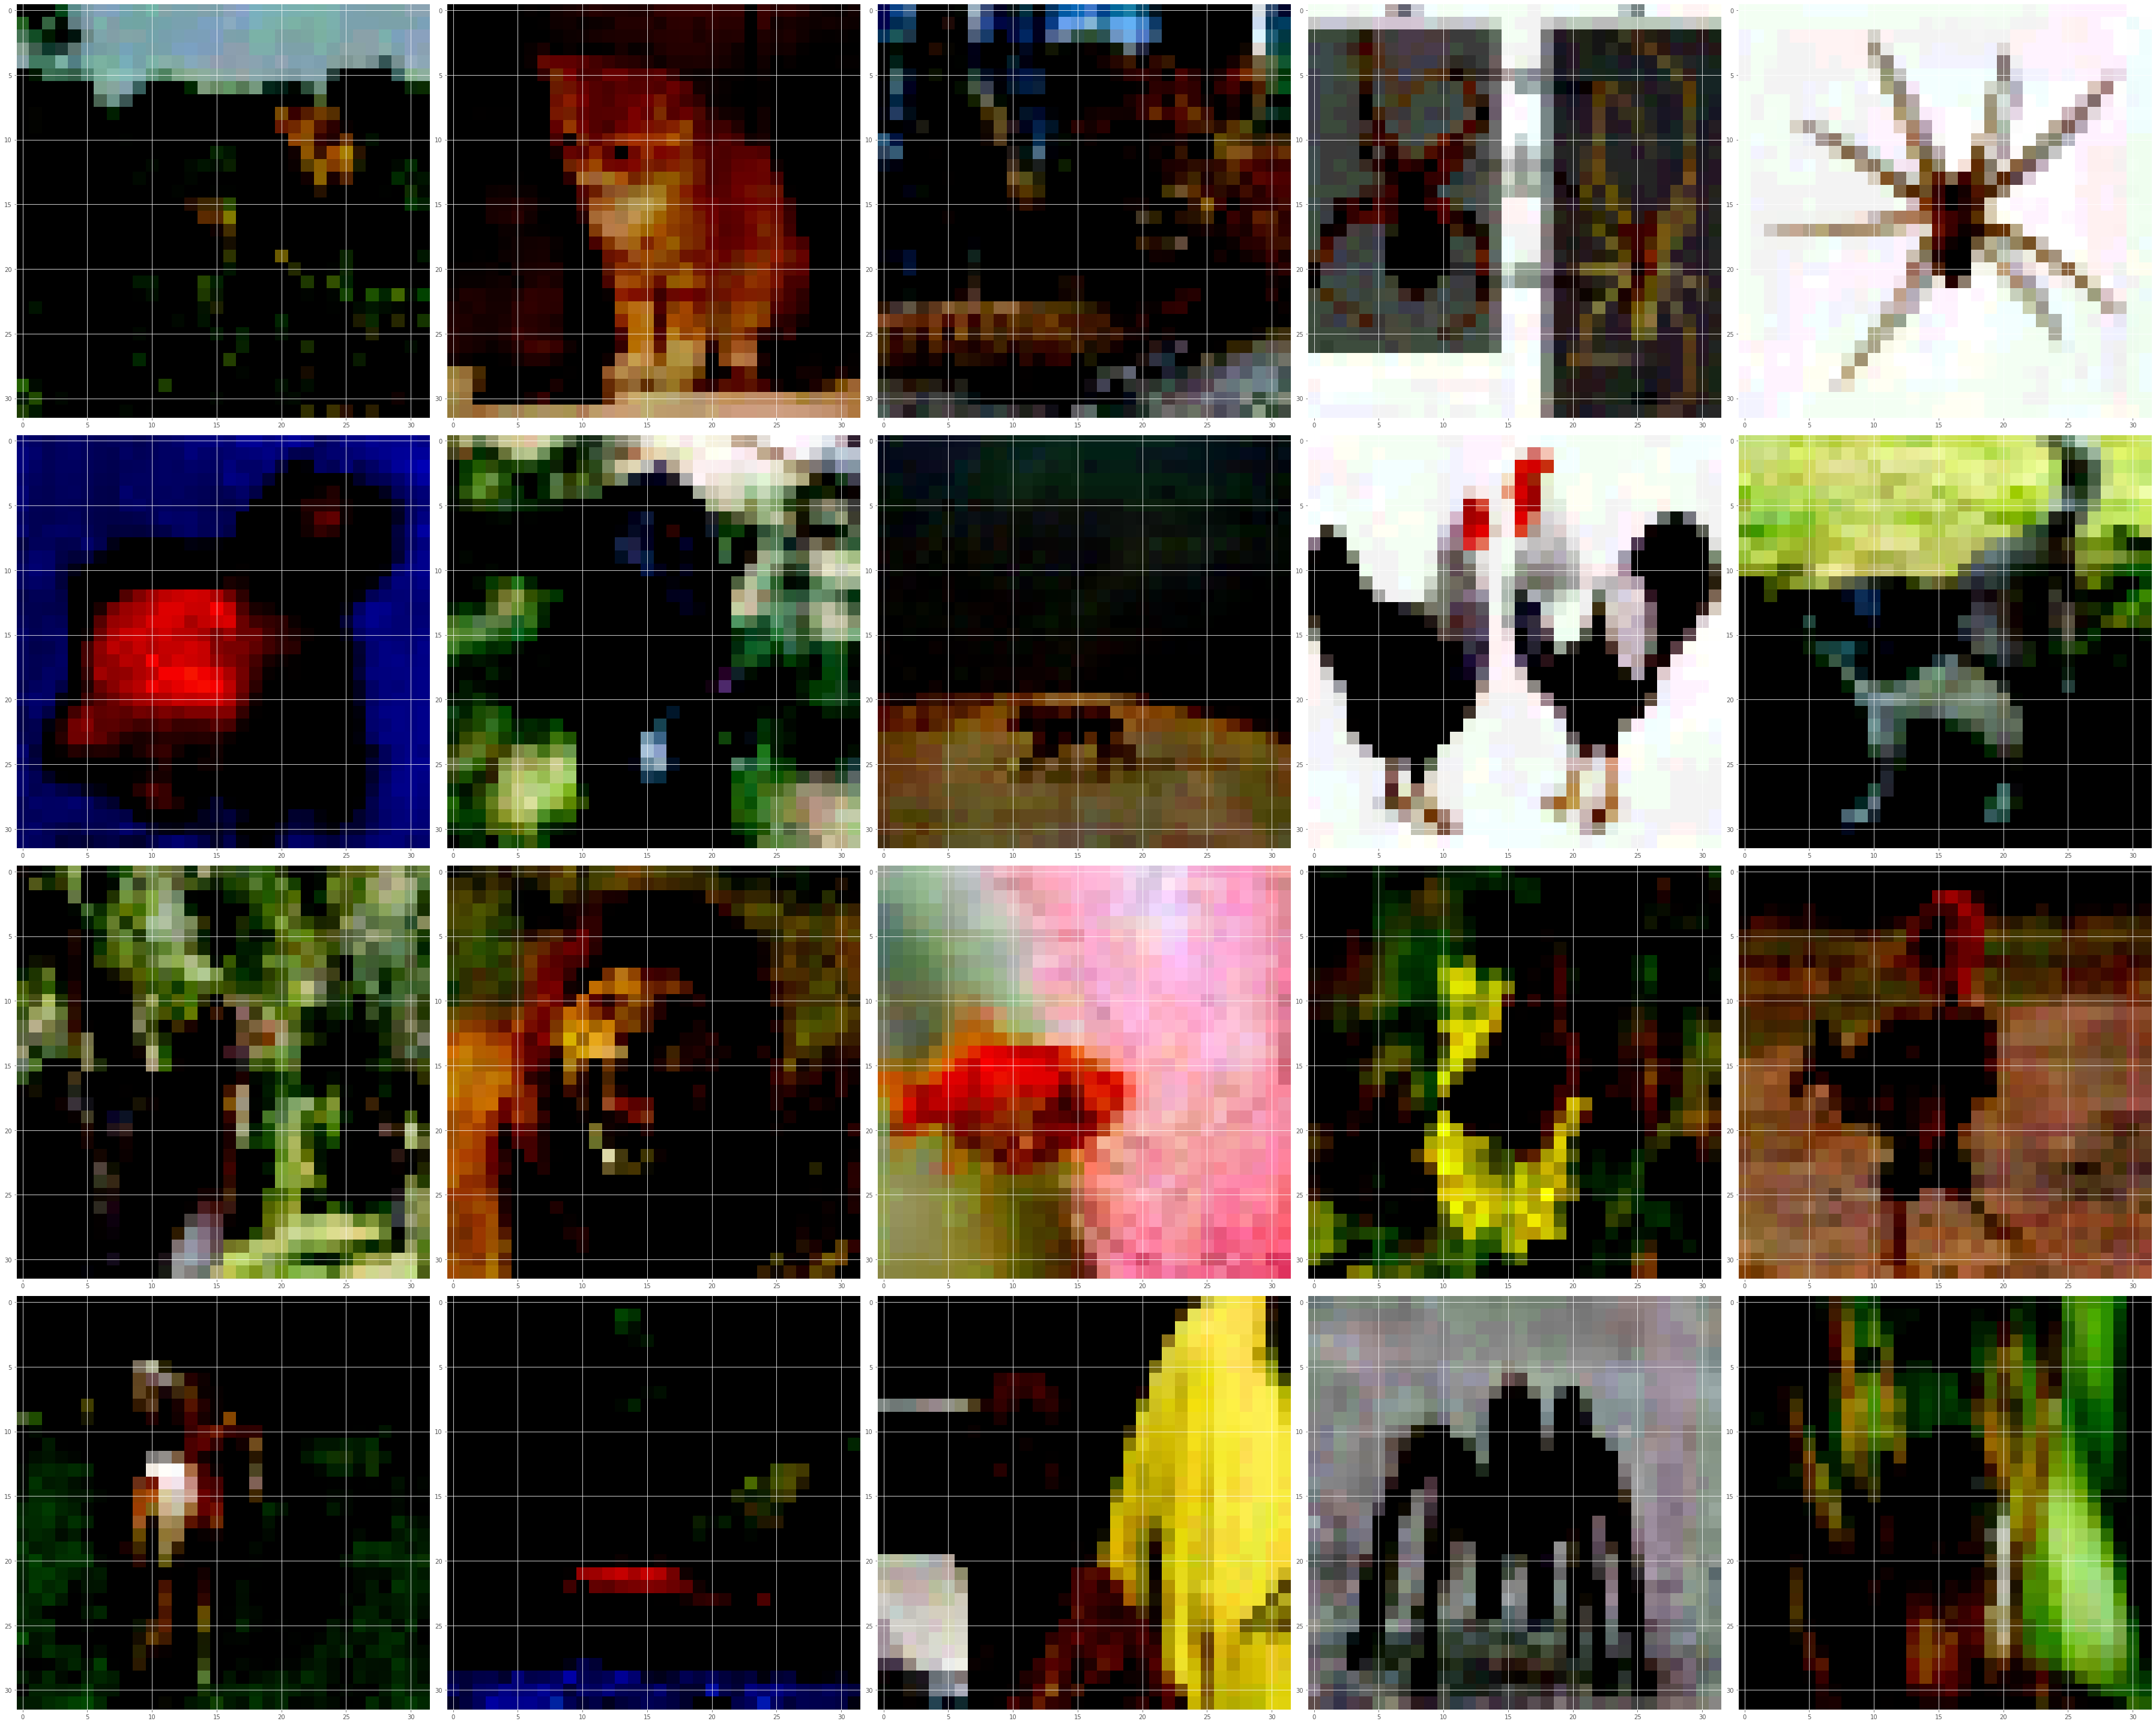

In [55]:
plot_image_grid(4,5,image_samples_mim)